# Exercise 04 : Histogram
## Required data

In [1]:
%ls ../data/checking-logs.sqlite

../data/checking-logs.sqlite


## Imports

In [2]:
import pandas as pd
import sqlite3

## Connect to database

In [3]:
db_connection = sqlite3.connect('../data/checking-logs.sqlite')

## Get all commit datetimes from `checker`

In [4]:
sql_query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

commits_datetimes_df = pd.read_sql(sql_query, db_connection, parse_dates=['datetime'])
commits_datetimes_df

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [5]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


## Get day type (weekend or working day)

In [6]:
commits_datetimes_df['daytype'] = commits_datetimes_df['datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
commits_datetimes_df

,datetime,daytype
0,2020-04-17 05:19:02.744528,working_day
1,2020-04-17 05:22:35.249331,working_day
2,2020-04-17 05:22:45.549397,working_day
3,2020-04-17 05:34:14.691200,working_day
4,2020-04-17 05:34:24.422370,working_day
...,...,...
3202,2020-05-21 20:19:06.872761,working_day
3203,2020-05-21 20:22:41.785725,working_day
3204,2020-05-21 20:22:41.877806,working_day
3205,2020-05-21 20:37:00.129678,working_day


## Get average counts per hour

In [7]:
commits_datetimes_df['hour'] = commits_datetimes_df['datetime'].dt.hour
commits_datetimes_df

,datetime,daytype,hour
0,2020-04-17 05:19:02.744528,working_day,5
1,2020-04-17 05:22:35.249331,working_day,5
2,2020-04-17 05:22:45.549397,working_day,5
3,2020-04-17 05:34:14.691200,working_day,5
4,2020-04-17 05:34:24.422370,working_day,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,working_day,20
3203,2020-05-21 20:22:41.785725,working_day,20
3204,2020-05-21 20:22:41.877806,working_day,20
3205,2020-05-21 20:37:00.129678,working_day,20


## Create a graph

In [8]:
import matplotlib.pyplot as plt

In [16]:
data = [commits_datetimes_df[commits_datetimes_df['daytype'] == 'working_day']['hour'].tolist(),
        commits_datetimes_df[commits_datetimes_df['daytype'] == 'weekend']['hour'].tolist()]
# data

[]

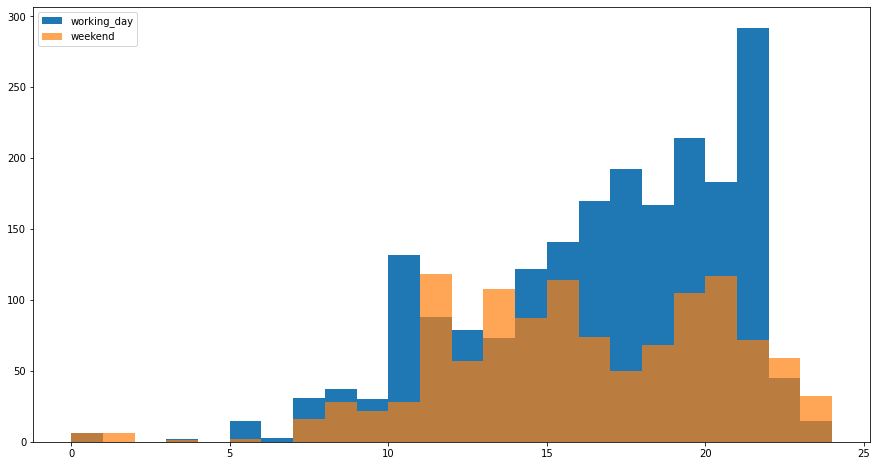

In [19]:
plt.figure(figsize=(15,8))

plt.hist(x=data[0],
         bins=range(0, 25),
         range=[0, 24]
        )

plt.hist(x=data[1],
         bins=range(0, 25),
         range=[0, 24],
         alpha=0.7
        )

plt.legend(['working_day', 'weekend'])
plt.plot()

## Disconnect database

In [11]:
db_connection.close()

## Are there hours when the total number of commits was higher on weekends than on working days?

The answer is: yes there are.

For example: 11, 13, 22, 23